## This notebook shows how the superdroplet datasets on the Derecho scratch can be accessed

In [1]:
from load_trajectories import get_timestamps, load_trajectories

In [2]:
load_trajectories

<function load_trajectories.load_trajectories(dirpath, num_timesteps=1, times=None)>

In [3]:
# Using the NPL 2024a kernel
import os
import os.path

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [76]:
%matplotlib inline

## Environmental variable file
This first filetype includes the time evolution of the simulated cloud in the 3D domain (the microphysical evolution of the cloud and its interaction with the dynamic environmnent)

In [77]:
# filepaths for 3d variables
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/"
fn = "cm1out.nc"

In [78]:
newncfilepath = os.path.join(dirpath, fn)
print(newncfilepath)

/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/cm1out.nc


In [79]:
nc = xr.open_dataset(newncfilepath)

In [80]:
# check what variables are available in this file
nc

<xarray.Dataset>
Dimensions:   (ni: 120, nip1: 121, nj: 120, njp1: 121, nk: 140, nkp1: 141, one: 1, time: 41)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:00:00.000488
Dimensions without coordinates: ni, nip1, nj, njp1, nk, nkp1, one
Data variables:
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    z         (nk) float32 ...
    zf        (nkp1) float32 ...
    sgs       (time, nj, ni) float32 ...
    actrate   (time, nk, nj, ni) float32 ...
    deactrat  (time, nk, nj, ni) float32 ...
    rh        (time, nk, nj, ni) float32 ...
    th        (time, nk, nj, ni) float32 ...
    prs       (time, nk, nj, ni) float32 ...
    qv        (time, nk, nj, ni) float32 ...
    qc        (time, nk, nj, ni) float32 ...
    qr        (time, nk, nj, ni) float32 ...
    qa        (time, nk, nj, ni) float32 ...
    qi        (tim

Definitions of the output variables specific for ice deposition simulations are given below:
- out8: mean size in um (a)
- out9: mean size in um (c)
- out10: ice number mixing ratio (#/kg)
- out11: mean settling velocity (m/s)
- out12: mean ice density (kg/m^3)
- out13: standard deviation of size in um (a_std)
- out14: standard deviation of size in um (c_std)
- deactrat: mean deposition/sublimation rate (kg/kg/s)

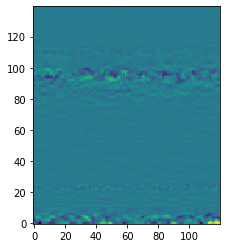

In [81]:
# this plots the horizontal velocity for a specific time (z vs. x)
plt.imshow(nc["vinterp"][24, :, 60, :], origin="lower")

## Superdroplet trajectory files
These text files include the position and attributes of individual superdroplets. When the large eddy simulation is run, the calculations for individual superdroplets are distributed across different processors for computational efficiency. To load all the superdroplets at a single model time step, we need to load all of the text files that are at the same time step. The naming convention for the files (e.g. "SD_output_ASCII_05430.pe000245") includes the time step (in this case time_step =5430) and the processor the superdroplets were processed on (in this case, the processor = 245). 

In [ ]:
# filepaths for trajectories
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/SDM_trajs/"
# this command lists all the files in the directory
trajfiles = os.listdir(dirpath)

In [83]:
# this is the file path for the first trajectory file in the directory
filepath = os.path.join(dirpath, trajfiles[0])

In [84]:
filepath

'/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/SDM_trajs/SD_output_ASCII_05280.pe000020'

In [85]:
# these are the column names for the data in the ascii files
cols = {
    0: "x[m]",
    1: "y[m]",
    
    2: "z[m]",
    3: "vz[m]",
    4: "radius(droplet)[m]",
    5: "mass_of_aerosol_in_droplet/ice(1:01)[g]",
    6: "radius_eq(ice)[m]",
    7: "radius_pol(ice)[m]",
    8: "density(droplet/ice)[kg/m3]",
    9: "rhod [kg/m3]",
    10: "multiplicity[-]",
    11: "status[-]",
    12: "index",
    13: "rime_mass[kg]",
    14: "num_of_monomers[-]",
    15: "rk_deact",
}

colnames = [
    "x[m]",
    "y[m]",
    "z[m]",
    "vz[m]",
    "radius(droplet)[m]",
    "mass_of_aerosol_in_droplet/ice(1:01)[g]",
    "radius_eq(ice)[m]",
    "radius_pol(ice)[m]",
    "density(droplet/ice)[kg/m3]",
    "rhod [kg/m3]",
    "multiplicity[-]",
    "status[-]",
    "index",
    "rime_mass[kg]",
    "num_of_monomers[-]",
    "rk_deact",
]

In [86]:
traj = pd.read_csv(
    filepath,
    sep="\s+",
    skiprows=1,
    header=None,
    delim_whitespace=False,
    names=colnames,
    index_col="index",
)

In [93]:
traj = traj[traj["z[m]"] > 0]
traj.reset_index()

,index,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],rime_mass[kg],num_of_monomers[-],rk_deact
0,304,10227.159,267.207020,9817.8229,0.0,0.0,4.603646e-13,0.000029,0.000029,443.01759,203.18,13565076480,ICE,0.0,1,35277104
1,707,10464.579,463.374830,9222.9961,0.0,0.0,3.962118e-14,0.000021,0.000021,460.94420,332.73,70467960832,ICE,0.0,1,77707083
2,737,10330.807,90.648202,9668.2532,0.0,0.0,3.453011e-14,0.000025,0.000025,465.52915,496.82,72555749376,ICE,0.0,1,35277537
3,1077,10468.836,355.238080,9630.9639,0.0,0.0,1.333735e-14,0.000025,0.000025,449.62187,341.36,73889251328,ICE,0.0,1,35277877
4,1922,10250.350,302.214770,9642.4682,0.0,0.0,5.103863e-13,0.000048,0.000048,438.78979,151.36,12078625792,ICE,0.0,1,35278722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,1355947,10354.271,437.236120,9373.3480,0.0,0.0,2.185584e-13,0.000030,0.000030,450.95880,203.18,28040101888,ICE,0.0,1,36632747
3368,1357900,10477.751,258.113780,9774.9383,0.0,0.0,3.150492e-14,0.000033,0.000033,453.59865,436.36,73706553344,ICE,0.0,1,36634700
3369,1357996,10257.743,301.673990,9736.2547,0.0,0.0,7.116150e-13,0.000030,0.000030,454.92888,583.18,8099348992,ICE,0.0,1,36634796
3370,1358316,10131.488,425.010980,8788.9003,0.0,0.0,4.931359e-13,0.000113,0.000113,422.20476,419.09,12560335872,ICE,0.0,1,36635116


In [40]:
# load the data for a single trajectory file using pandas
# ATTEMPT TO USE THE DASK FOR FILE

# traj= dd.read_csv(filepath,sep = '\s+',skiprows=1,header=None,delim_whitespace=False,names=colnames,index_col='index')
# traj = dd.read_csv

In [95]:
trajectory = traj.to_xarray()
trajectory

<xarray.Dataset>
Dimensions:                                  (index: 3372)
Coordinates:
  * index                                    (index) int64 304 707 ... 1358461
Data variables:
    x[m]                                     (index) float64 1.023e+04 ... 1.009e+04
    y[m]                                     (index) float64 267.2 ... 381.7
    z[m]                                     (index) float64 9.818e+03 ... 9.082e+03
    vz[m]                                    (index) float64 0.0 0.0 ... 0.0 0.0
    radius(droplet)[m]                       (index) float64 0.0 0.0 ... 0.0 0.0
    mass_of_aerosol_in_droplet/ice(1:01)[g]  (index) float64 4.604e-13 ... 7.889e-13
    radius_eq(ice)[m]                        (index) float64 2.868e-05 ... 7.853e-05
    radius_pol(ice)[m]                       (index) float64 2.868e-05 ... 7.853e-05
    density(droplet/ice)[kg/m3]              (index) float64 443.0 ... 423.9
    rhod [kg/m3]                             (index) float64 203.2 ... 393.

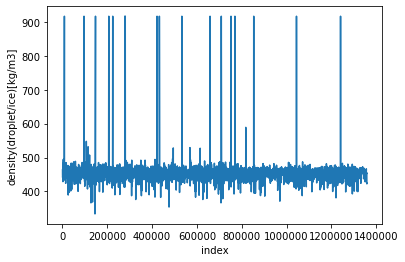

In [96]:
trajectory["density(droplet/ice)[kg/m3]"].plot()

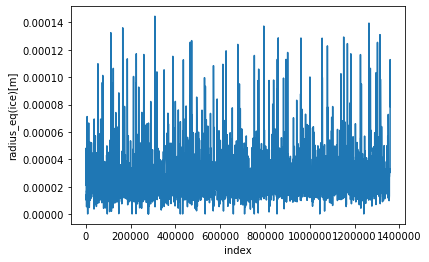

In [97]:
trajectory["radius_eq(ice)[m]"].plot()

In [98]:
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 4 timestamps (every two minutes)
coarse_timestamps = timestamps[0::4]
print(coarse_timestamps)
trajs = load_trajectories(dirpath, num_timesteps=5, times=coarse_timestamps)
# trajs

[5100 5220 5340 5460 5580 5700 5820 5940 6060 6180 6300 6420 6540 6660
 6780 6900 7020 7140]
Loading trajectories for time 5100 
Loading trajectories for time 5220 
Loading trajectories for time 5340 
Loading trajectories for time 5460 
Loading trajectories for time 5580 


In [99]:
# wrong one; we don't want to just find the index
traj1839 = trajs[trajs["index"] == 1839]
traj1839

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
941892399,3259.9497,11273.9360,9563.3612,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5100
684371759,2352.4851,8128.1848,9489.9541,0.0,0.0,8.441880e-14,1.581682e-05,1.581682e-05,460.99146,540.00,53229633536,ICE,1839,0.0,1,5100
941892399,3233.8714,11263.4190,9562.2017,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5220
684371759,2338.9289,8141.2439,9521.6421,0.0,0.0,8.441880e-14,1.654310e-05,1.654310e-05,465.10180,540.00,53229633536,ICE,1839,0.0,1,5220
941892399,3212.8923,11252.9690,9557.0263,0.0,0.0,4.982834e-14,1.000000e-07,1.000000e-07,916.80000,332.73,66127384576,ICE,1839,0.0,1,5340
684371759,2331.1208,8148.6154,9567.9420,0.0,0.0,8.441880e-14,1.744628e-05,1.744628e-05,467.41130,540.00,53229633536,ICE,1839,0.0,1,5340
684371759,2313.7171,8155.1853,9632.0026,0.0,0.0,8.441880e-14,1.852721e-05,1.852721e-05,468.45408,540.00,53229633536,ICE,1839,0.0,1,5460
941892399,3191.4758,11244.9860,9569.0705,0.0,0.0,4.982834e-14,1.462762e-06,1.462762e-06,610.05347,332.73,66127384576,ICE,1839,0.0,1,5460
684371759,2286.5585,8152.7767,9661.4310,0.0,0.0,8.441880e-14,1.916260e-05,1.916260e-05,471.05129,540.00,53229633536,ICE,1839,0.0,1,5580


In [65]:
# checks if the density is not 916.8 to identify that it is not a duplicate
# traj1839 = trajs[trajs['density(droplet/ice)[kg/m3]']!=916.80000]
# traj1839[traj1839['index'] == 304]

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
35277104,10247.191,285.55230,9740.0787,0.0,0.0,4.603646e-13,0.000028,0.000028,439.38230,203.18,13565076480,ICE,304,0.0,1,5100
35277104,10244.592,280.10652,9759.2363,0.0,0.0,4.603646e-13,0.000028,0.000028,440.11344,203.18,13565076480,ICE,304,0.0,1,5130
35277104,10241.599,274.41092,9776.1006,0.0,0.0,4.603646e-13,0.000028,0.000028,440.48219,203.18,13565076480,ICE,304,0.0,1,5160
35277104,10238.095,268.82023,9790.7368,0.0,0.0,4.603646e-13,0.000028,0.000028,441.79240,203.18,13565076480,ICE,304,0.0,1,5190
35277104,10234.341,265.16436,9803.0233,0.0,0.0,4.603646e-13,0.000029,0.000029,442.33447,203.18,13565076480,ICE,304,0.0,1,5220


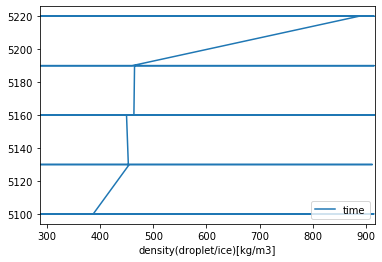

In [66]:
traj1839.plot.line(x="density(droplet/ice)[kg/m3]", y="time")

In [67]:
timestamps = []
processors = []
filelen = []
filenames = []

for file in trajfiles:
    if len(file) > 29:
        filelen.append(len(file))
        filenames.append(file)
        timestamps.append(int(file[16:21]))
        processors.append(int(file[24:]))

Text(0.5, 0, 'Time stamp')

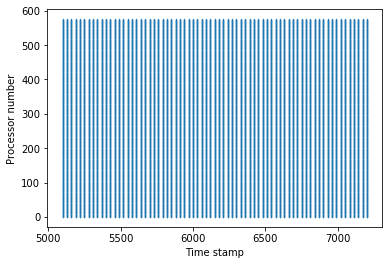

In [74]:
plt.scatter(timestamps, processors, s=0.2)
plt.ylabel("Processor number")
plt.xlabel("Time stamp")

In [77]:
times = np.unique(timestamps)

In [78]:
# these are the timestamps we have saved information about the location and attributes of each superdroplet (in seconds)
print(times)

[5100 5130 5160 5190 5220 5250 5280 5310 5340 5370 5400 5430 5460 5490
 5520 5550 5580 5610 5640 5670 5700 5730 5760 5790 5820 5850 5880 5910
 5940 5970 6000 6030 6060 6090 6120 6150 6180 6210 6240 6270 6300 6330
 6360 6390 6420 6450 6480 6510 6540 6570 6600 6630 6660 6690 6720 6750
 6780 6810 6840 6870 6900 6930 6960 6990 7020 7050 7080 7110 7140 7170
 7200]


In [79]:
# these are the times in the 3D environmental variable file (note the environmental variables are recorded at a different frequency than the superdroplet data)
nc["time"] / 1e9

<xarray.DataArray 'time' (time: 41)>
array([5160, 5220, 5280, 5340, 5400, 5460, 5160, 5220, 5280, 5340, 5400, 5460,
       5520, 5580, 5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120, 6180,
       6240, 6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720, 6780, 6840, 6900,
       6960, 7020, 7080, 7140, 7200], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:00:00.000488

## Load all the trajectory data for a single time step

In [51]:
# for a specific time, load in all the superdroplet data
idx0 = np.where(timestamps == times[0])

NameError: name 'times' is not defined

In [52]:
fn0 = [filenames[idx0[0][i]] for i in range(0, len(idx0[0]))]

NameError: name 'idx0' is not defined

In [49]:
# this goes through all the files at the first time step, loads the trajectory data, concatenates it to the pandas dataframe
i = 0
for fn in fn0:
    filepath = os.path.join(dirpath, fn)
    traj = pd.read_csv(
        filepath,
        sep="\s+",
        skiprows=1,
        header=None,
        delim_whitespace=False,
        names=colnames,
        index_col="rk_deact",
    )
    if i == 0:
        trajs = traj
    else:
        trajs = pd.concat([trajs, traj])
    i = i + 1

NameError: name 'fn0' is not defined

In [50]:
# this is the total number of superdroplets at this time step
print(len(trajs))

7867203


In [84]:
traj0 = trajs.sort_index()

In [85]:
# this drops some unnecessary columns from the dataframe
colnames = [
    "x[m]",
    "y[m]",
    "z[m]",
    "vz[m]",
    "radius(droplet)[m]",
    "radius_eq(ice)[m]",
    "radius_pol(ice)[m]",
    "density(droplet/ice)[kg/m3]",
    "status[-]",
    "index",
    "rime_mass[kg]",
    "num_of_monomers[-]",
    "rk_deact",
]
dropcols = [
    "vz[m]",
    "radius(droplet)[m]",
    "status[-]",
    "index",
    "rime_mass[kg]",
    "num_of_monomers[-]",
]

traj0 = traj0.drop(columns=dropcols)

In [86]:
traj0 = traj0.reset_index()

In [87]:
traj0.head()

,rk_deact,x[m],y[m],z[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-]
0,345,473.12640,474.646910,9500.5181,1.696665e-14,0.000013,0.000013,447.15654,289.55,75815124992
1,514,410.95111,241.540830,9719.1948,4.244163e-14,0.000023,0.000023,464.61306,263.64,69272150016
2,872,258.41102,331.613820,9533.4725,1.622385e-13,0.000009,0.000009,494.52613,375.91,35479605248
3,962,466.02906,450.631740,9662.1907,8.539189e-14,0.000008,0.000008,455.89723,194.55,52921167872
4,1107,169.25433,20.785657,9577.0813,4.147985e-14,0.000027,0.000027,473.55919,401.82,69681471488


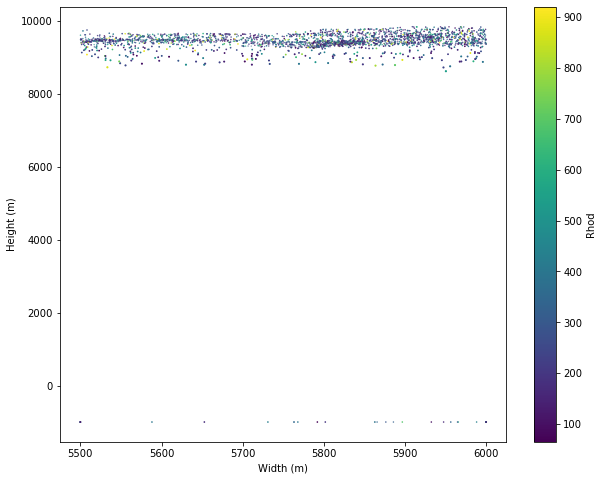

In [88]:
xs = traj["x[m]"].values
ys = traj["y[m]"].values
zs = traj["z[m]"].values
rads = 1e4 * traj["radius_eq(ice)[m]"].values
rhod = traj["rhod [kg/m3]"].values

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(xs, zs, s=rads, c=rhod)
plt.ylabel("Height (m)")
plt.xlabel("Width (m)")
plt.colorbar(label="Rhod")

# Single Droplet (Density and Time Relationship)

In [53]:
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 4 timestamps (every two minutes)
coarse_timestamps = timestamps[0::4]
print(coarse_timestamps)
trajs = load_trajectories(dirpath, num_timesteps=5, times=coarse_timestamps)

[5100 5220 5340 5460 5580 5700 5820 5940 6060 6180 6300 6420 6540 6660
 6780 6900 7020 7140]
Loading trajectories for time 5100 
Loading trajectories for time 5220 
Loading trajectories for time 5340 
Loading trajectories for time 5460 
Loading trajectories for time 5580 


In [24]:
trajs.loc[[941890922, 941891358, 941891618, 1357900, 941892406]]
# trajs[trajs['index'] == 1839]
# trajs.plot.line(x='density(droplet/ice)[kg/m3]', y='time')

NameError: name 'trajs' is not defined

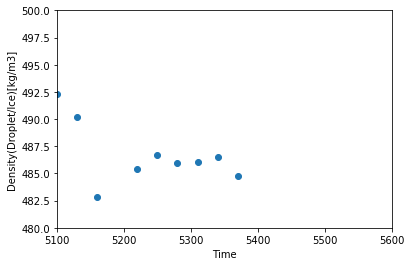

In [109]:
# DROPLET: 941890922
trajs.loc[941890922]
trajs2 = trajs.to_xarray()
x = trajs2["time"].sel(rk_deact=941890922)
y = trajs2["density(droplet/ice)[kg/m3]"].sel(rk_deact=941890922)

plt.ylabel("Density(Droplet/Ice)[kg/m3]")
plt.xlabel("Time")
plt.xlim(5100, 5600)
plt.ylim(480, 500)

plt.scatter(x, y, marker="o")
plt.show()

In [112]:
# DROPLET: 941891358
trajs2.loc[941891358]
trajs2 = trajs.to_xarray()
x = trajs2["time"].sel(rk_deact=941891358)
y = trajs2["density(droplet/ice)[kg/m3]"].sel(rk_deact=941891358)

plt.ylabel("Density(Droplet/Ice)[kg/m3]")
plt.xlabel("Time")
plt.xlim(5100, 5300)
plt.ylim(480, 500)

plt.scatter(x, y, marker="o")
plt.show()

TypeError: can only lookup dictionaries from Dataset.loc

In [ ]:
# DROPLET: 941890922
trajs2.loc[941890922]
trajs2 = trajs.to_xarray()
x = trajs2["time"].sel(rk_deact=941890922)
y = trajs2["density(droplet/ice)[kg/m3]"].sel(rk_deact=941890922)

plt.ylabel("Density(Droplet/Ice)[kg/m3]")
plt.xlabel("Time")
plt.xlim(5100, 5300)
plt.ylim(480, 500)

plt.scatter(x, y, marker="o")
plt.show()

In [22]:
%history

traj.head()
traj = traj[traj['z[m]'] > 0]
traj = pd.read_csv(filepath,sep = '\s+',skiprows=1,header=None,delim_whitespace=False,names=colnames,index_col='index')
from load_trajectories import load_trajectories, get_timestamps
load_trajectories
# Using the NPL 2024a kernel
import numpy as np
import xarray as xr
import os.path
import os
import pandas as pd
import dask
import dask.dataframe as dd

from matplotlib import pyplot as plt
%matplotlib inline
# filepaths for 3d variables
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/'
fn = 'cm1out.nc'
newncfilepath = os.path.join(dirpath,fn)
print(newncfilepath)
nc=xr.open_dataset(newncfilepath)
# check what variables are available in this file
nc
# this plots the horizontal velocity for a specific time (z vs. x)
plt.imshow(nc['vinterp'][24,:,60,:],origin='lower')
# filepaths for trajectories
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_